# Introduction
In this Notebook, we will launch a Jupyter Notebook to train a logistic regression model based on the MNIST dataset.

Start by importing the modules. We are using Scikit-learn and relevant modules for this model. Since the environment doesn’t have joblib module, we will install it before using it. This is a one-time task that needs to run at the beginning of the training job.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import joblib
import os

Next, we will create a couple of helper functions that load the dataset and changes the shape as expected by Scikit-learn.

In [2]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images-idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    labels = np.fromfile( folder + "/" + prefix + '-labels-idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels

In [3]:
def adjustShape(dataset):
    nsamples, nx, ny = dataset.shape
    new_dataset = dataset.reshape((nsamples,nx*ny))
    return new_dataset

We will now load the MNIST dataset from /datasets location. You can browse the files within the Jupyter environment.

![](https://blobscdn.gitbook.com/v0/b/gitbook-28427.appspot.com/o/assets%2F-LHZRFUkajubOAmgu6Rd%2F-LgLpXyaONXCTpaQEVXF%2F-LgLpclhm5LXEFzVqFxQ%2Fstep-4-4a.jpg?alt=media&token=b67ab30b-e74b-47a1-aae5-399828ecf6a8)

The loadMNIST helper function loads the dataset and converts into a NumPy array.



In [4]:
X_train, y_train = loadMNIST( "train", "/datasets/mnist/" )
X_test, y_test = loadMNIST( "t10k", "/datasets/mnist/" )

Let us verify if the dataset is loaded correctly by randomly visualizing a few data points.

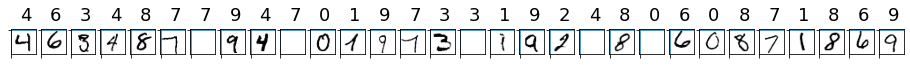

In [5]:
count = 0
sample_size = 30
plt.figure(figsize = (16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

Before we pass the training and test data to Scikit-learn Logistic Regression object, we need to reshape it.

In [6]:
X_train=adjustShape(X_train)
X_test=adjustShape(X_test)

We are now ready to fit the data into a logistic regression model.

In [ ]:
clf = LogisticRegression(solver='lbfgs', multi_class='ovr')
clf.fit(X_train, y_train)

Let’s call the predict method to see how accurate our model is. We will use the output of this to generate a confusion matrix.

In [8]:
print('Predict the test set')
y_hat = clf.predict(X_test)

Predict the test set


Then let's print a confusion matrix.

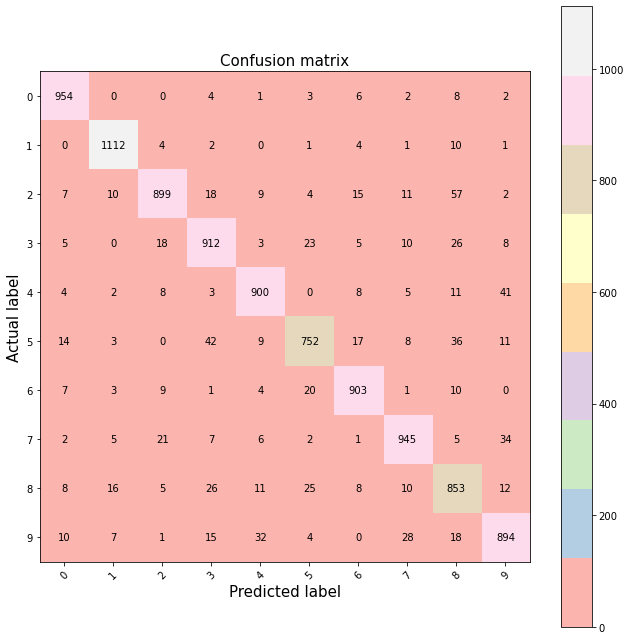

In [9]:
cm = metrics.confusion_matrix(y_test, y_hat)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

## Save the model in your Persistent Storage
Finally, we will persist the trained model at `/storage/mnist` for accessing it later. The model that is saved to model.pkl is available to other Notebooks and Jobs launched within your account.

In [10]:
os.makedirs("/storage/mnist/", exist_ok=True)
joblib.dump(value=clf, filename='/storage/mnist/model.pkl')        

['/storage/mnist/model.pkl']

You can use the Jupyter environment to navigate to the `/storage/mnist` directory to find the saved model.

![](https://blobscdn.gitbook.com/v0/b/gitbook-28427.appspot.com/o/assets%2F-LHZRFUkajubOAmgu6Rd%2F-LgLpXyaONXCTpaQEVXF%2F-LgLpcmI9fOxTJkO1ECH%2Fstep-5-15.jpg?alt=media&token=8085cb3b-f12c-46b2-a935-a4865f14427e)